In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load the stock dataset
data = pd.read_csv('SKL.BO.csv')

# Preview the dataset
print(data.head())

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])


         Date   Open   High    Low  Close  Adj Close  Volume
0  2017-02-02  12.60  12.60  12.60  12.60      12.60   20000
1  2017-02-03  13.23  13.23  13.23  13.23      13.23   20000
2  2017-02-06  13.89  13.89  13.89  13.89      13.89   40000
3  2017-02-07  14.58  14.58  14.58  14.58      14.58   60000
4  2017-02-08  15.30  15.30  15.30  15.30      15.30  220000


In [11]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values
data.fillna(method='ffill', inplace=True)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\adity\AppData\Local\Temp\ipykernel_18360\4182027573.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [12]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Drop NA values from returns
data.dropna(subset=['Daily_Return'], inplace=True)


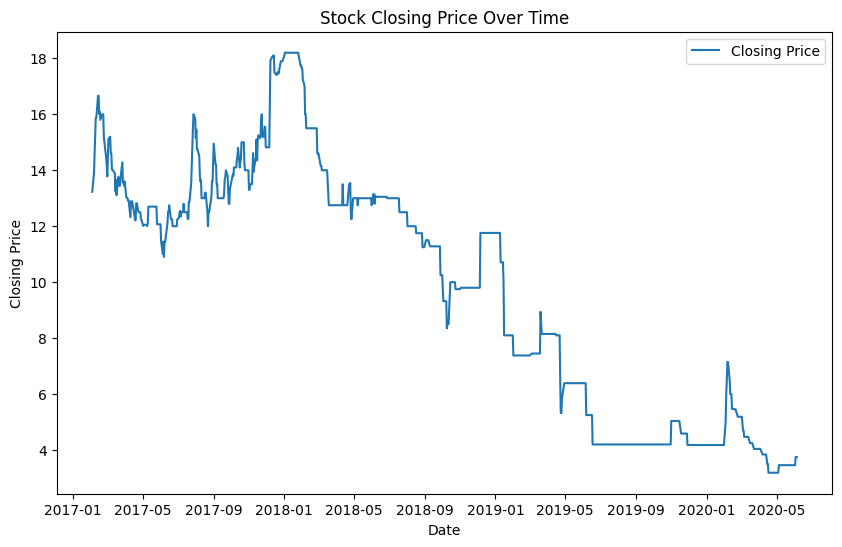

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


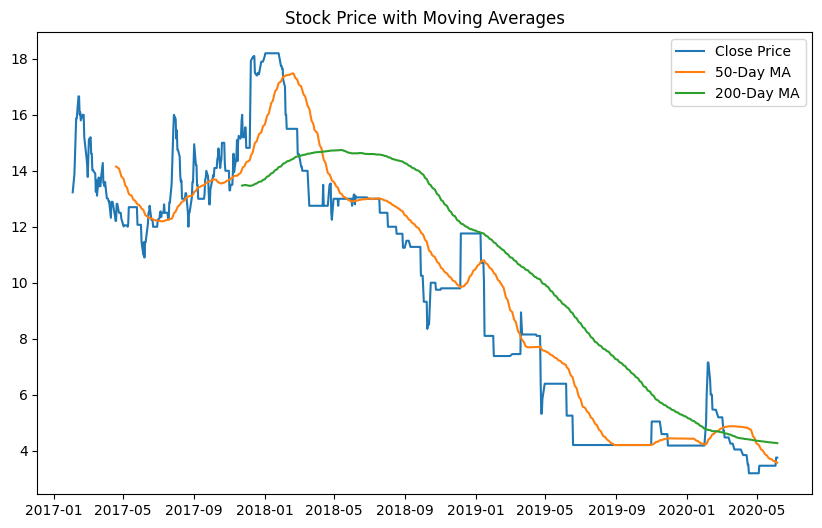

In [14]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['50_MA'], label='50-Day MA')
plt.plot(data['Date'], data['200_MA'], label='200-Day MA')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()


In [15]:
# Create Moving Average Convergence Divergence (MACD)
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()

# Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Fill missing values for the RSI
data['RSI'].fillna(50, inplace=True)


In [16]:
# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD']]
y = data['Close']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


MSE: 0.0059750672503428946
R-squared: 0.9997205218751065


In [18]:
future_price = model.predict(X_test)


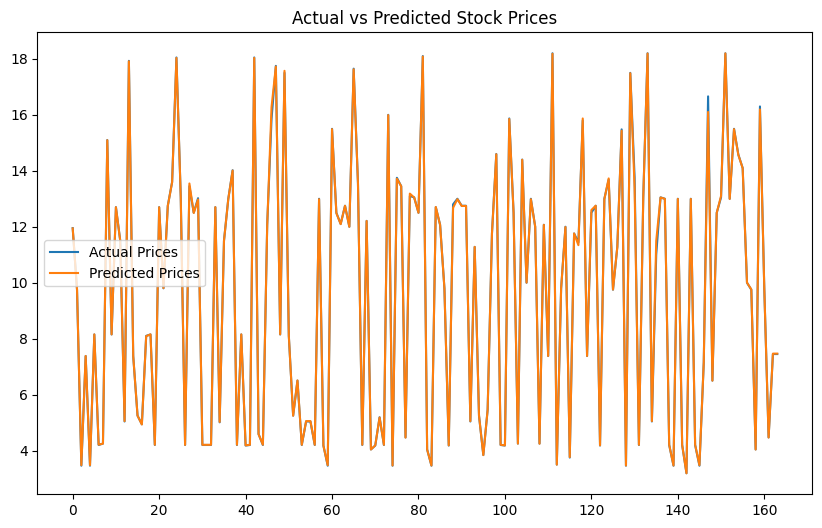

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
